In [11]:
# Importar las librerias
import tensorflow as tf
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [3]:
# Definir las entradas que corresponden a grados kilos
# Entradas

kilogramos = np.random.uniform(1, 1000, 1000)

# Convertir a libras
libras = kilogramos * 2.20462

libras.shape, kilogramos.shape

((1000,), (1000,))

In [4]:
#Separar datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(kilogramos, libras, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800,), (200,), (800,), (200,))

In [52]:
# Definir los hiperparametros
learning_rate = 0.05
epochs = 1000

In [53]:
# Crear las capas
oculta1 = tf.keras.layers.Dense( units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense( units=3 )
salida = tf.keras.layers.Dense(units=1)

# Crear modelo de keras
modelo = tf.keras.Sequential([oculta1,oculta2,salida])

In [54]:
# Compilar el modelo
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate),
    loss = 'mean_squared_error',
    metrics=['mean_absolute_error']
)

In [55]:
# Entrenar el modelo con los datos de entrenamiento
print("Entrenando . . .")
historial = modelo.fit(x_train, y_train, epochs = epochs, verbose=False)
print("Modelo entrenado")

Entrenando . . .
Modelo entrenado


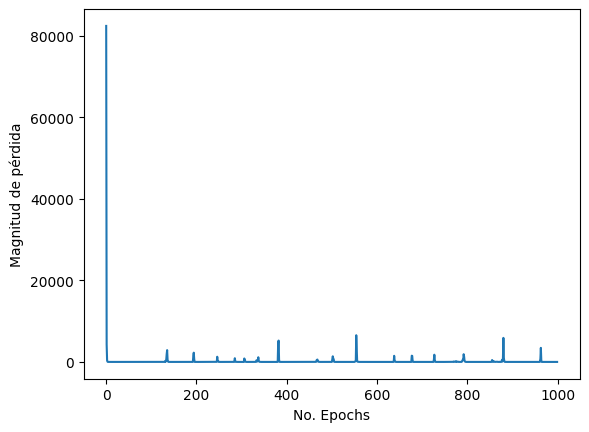

In [65]:
# Mostrar el resultado de la función de pérdida
import matplotlib.pyplot as plt
plt.xlabel("No. Epochs")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])

In [56]:
# Obtener el peso y bias ajustados
print(f"Weights y bias ajustados: {salida.get_weights()}")

Weights y bias ajustados: [array([[-8.2660693e-04],
       [-3.3729505e-02],
       [-1.0101892e+00]], dtype=float32), array([3.0547075], dtype=float32)]


In [66]:
# Intentar predecir a cueanto equivale 15 grados centigrados en Fahrenheit

kilos= np.array([16])
resultado = modelo.predict(kilos)
print(f"{kilos[0]} es equivalente a {resultado[0][0]} libras")

kilos= np.array([6])
resultado = modelo.predict(kilos)
print(f"{kilos[0]} es equivalente a {resultado[0][0]} libras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
16 es equivalente a 35.27385711669922 libras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6 es equivalente a 13.227654457092285 libras


In [60]:
#Guardar el modelo
modelo.save("modelo.keras")

In [61]:
from google.colab import files
from google.colab import files
files.download("modelo.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>